#### Importando bibliotecas

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

#### Mesclando o dataset com a geometria dos países

In [79]:
data = pd.read_csv('dataset_tratado.csv')
data.head()

,abreviacao,pais,populacao,rank_populacao,qtd_planos_internet,1GB_preco_medio,1GB_mais_barato,1GB_mais_caro,usuarios_internet,PIB_per_capita,populacao_urbana_%,usuarios_internet_%,rank_usuarios,regiao,grupo_renda
0,CHN,China,1425873641,1,36.0,0.52,0.30,1.21,1010740000,2425.471293,43.10,54.30,116.0,East Asia & Pacific,Upper middle income
1,IND,India,1418914739,2,58.0,0.68,0.05,2.73,833710000,786.700098,29.54,34.45,145.0,South Asia,Lower middle income
2,USA,United States,338573477,3,45.0,3.33,1.00,30.00,312320000,37491.179520,81.70,75.23,68.0,North America,High income
3,IDN,Indonesia,275818905,4,53.0,0.42,0.17,2.94,196000000,1143.831514,51.46,32.29,150.0,East Asia & Pacific,Lower middle income
4,PAK,Pakistan,236650690,5,60.0,0.59,0.06,8.59,118800000,668.547943,36.16,30.68,184.0,South Asia,Lower middle income


In [80]:
df = gpd.read_file(r'datasets\UIA_Latitude_Longitude_Graticules_and_World_Countries_Boundaries.geojson')

In [81]:
df = df.rename(columns = {'CNTRY_NAME': 'pais'})
df.head()

,OBJECTID,pais,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


In [82]:
map_ = pd.merge(df, data, how = 'outer', on = 'pais')

In [83]:
map_.head()

,OBJECTID,pais,geometry,abreviacao,populacao,rank_populacao,qtd_planos_internet,1GB_preco_medio,1GB_mais_barato,1GB_mais_caro,usuarios_internet,PIB_per_capita,populacao_urbana_%,usuarios_internet_%,rank_usuarios,regiao,grupo_renda
0,1.0,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",AFG,41325562.0,36.0,35.0,1.02,0.38,2.12,4068194.0,NaN,24.04,11.45,194.0,South Asia,Low income
3,4.0,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",DZA,45032322.0,34.0,20.0,0.51,0.16,2.24,26350000.0,2231.993335,65.22,47.69,130.0,Middle East & North Africa,Upper middle income
4,5.0,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41...",AZE,10368297.0,91.0,42.0,1.82,0.24,9.80,7763795.0,2344.896916,51.92,79.00,54.0,Europe & Central Asia,Upper middle income


In [84]:
data.shape

(164, 15)

In [85]:
map_.shape

(256, 17)

In [86]:
pd.set_option('display.max_rows', None)

#### População

##### Adicionando valores manualmente de países faltantes

In [87]:
map_['populacao'][39] = 92378000

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\2073428320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][39] = 92378000


In [88]:
map_['populacao'][40] = 96272259

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\1624010759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][40] = 96272259


In [89]:
map_['populacao'][50] = 4422397

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\2086051804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][50] = 4422397


In [90]:
map_['populacao'][61] = 102334000

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\118681730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][61] = 102334000


In [91]:
map_['populacao'][69] = 296711

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\3146970229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][69] = 296711


In [92]:
map_['populacao'][107] = 86463599

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\1401618535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][107] = 86463599


In [93]:
map_['populacao'][121] = 23906070

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\129945363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][121] = 23906070


In [94]:
map_['populacao'][123] = 51446201

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\2433463719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][123] = 51446201


In [95]:
map_['populacao'][192] = 145934000

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\286994163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][192] = 145934000


In [96]:
map_['populacao'][225] = 85043000

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\1915110379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][225] = 85043000


In [97]:
map_['populacao'][229] = 64256720

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\2305037945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][229] = 64256720


In [98]:
map_['populacao'][238] = 29615574

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\4000565917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][238] = 29615574


In [99]:
map_['populacao'][242] = 2682669

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\3294729301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][242] = 2682669


In [100]:
map_['populacao'][110] = 23740424

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\3116550743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][110] = 23740424


In [101]:
map_['populacao'][68] = 10725000

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\1073404583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][68] = 10725000


In [102]:
map_['populacao'][133] = 5460000

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\1779368844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][133] = 5460000


In [103]:
map_['populacao'][27] = 6628000

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\975020304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][27] = 6628000


In [104]:
map_['populacao'][120] = 6628000

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\4022545802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][120] = 6628000


In [105]:
map_['populacao'][25] = 55501036

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\3860101195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][25] = 55501036


In [106]:
map_['populacao'][127] = 7568608

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\3023848554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['populacao'][127] = 7568608


##### Plotando o mapa

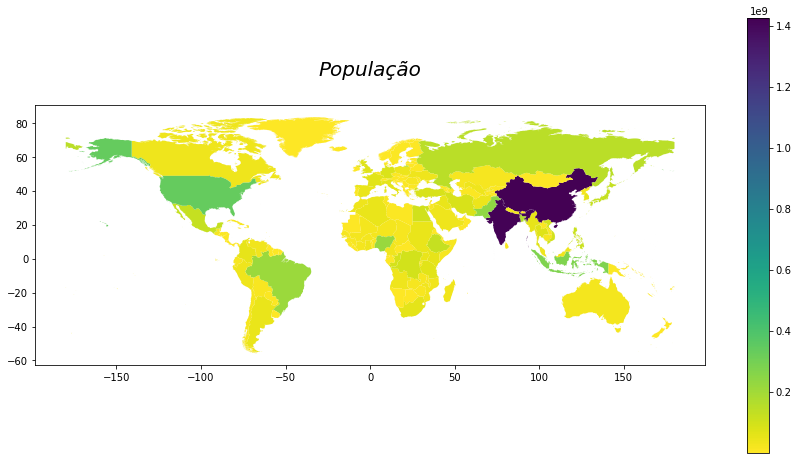

In [107]:
fig, ax = plt.subplots(figsize = (15,8))
sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=plt.Normalize(vmin=map_['populacao'].min(), vmax=map_['populacao'].max()))
cbar = fig.colorbar(sm)
map_.plot('populacao', ax=ax, cmap="viridis_r")
plt.title('População', fontsize = "20", style = "italic", loc = "center", pad = 30)
plt.savefig("static\img\populacao_mapa.png", dpi=300, facecolor='white', bbox_inches='tight')

#### PIB

##### Adicionando valores manualmente de países faltantes

In [108]:
map_['PIB_per_capita'][39] = 518

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\681838699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][39] = 518


In [109]:
map_['PIB_per_capita'][40] = 1543

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\3353401686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][40] = 1543


In [110]:
map_['PIB_per_capita'][50] = 411

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\2029568580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][50] = 411


In [111]:
map_['PIB_per_capita'][61] = 4086

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\1970498024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][61] = 4086


In [112]:
map_['PIB_per_capita'][69] = 8300

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\862391008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][69] = 8300


In [113]:
map_['PIB_per_capita'][107] = 5333

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\1063809796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][107] = 5333


In [114]:
map_['PIB_per_capita'][121] = 4058

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\3849649641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][121] = 4058


In [115]:
map_['PIB_per_capita'][123] = 32645

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\1038417671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][123] = 32645


In [116]:
map_['PIB_per_capita'][192] = 10220

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\2469101125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][192] = 10220


In [117]:
map_['PIB_per_capita'][225] = 13251

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\2306846199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][225] = 13251


In [118]:
map_['PIB_per_capita'][229] = 1075

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\3699848215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][229] = 1075


In [119]:
map_['PIB_per_capita'][238] = 14025

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\2409199280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][238] = 14025


In [120]:
map_['PIB_per_capita'][242] = 4099

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\621802374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][242] = 4099


In [121]:
map_['PIB_per_capita'][110] = 2414

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\813768628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][110] = 2414


In [122]:
map_['PIB_per_capita'][68] = 37482

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\4018966886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][68] = 37482


In [123]:
map_['PIB_per_capita'][133] = 37482

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\1850562957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][133] = 37482


In [124]:
map_['PIB_per_capita'][27] = 19687	

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\2009599867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][27] = 19687


In [125]:
map_['PIB_per_capita'][120] = 3900

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\3234918301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][120] = 3900


In [126]:
map_['PIB_per_capita'][25] = 7787

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\4115319104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][25] = 7787


In [127]:
map_['PIB_per_capita'][127] = 8454

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\3632144761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][127] = 8454


In [128]:
map_['PIB_per_capita'][2] = 1835

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\561761143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['PIB_per_capita'][2] = 1835


##### Retirando os países pequenos com PIBs muito grandes

In [129]:
for i in range(len(map_)):
    if (map_.loc[i, 'PIB_per_capita'] > 60000):
        print (map_.loc[i, 'pais'])
    else:
        None

Bermuda
Liechtenstein
Monaco


In [130]:
map_.loc[map_.pais == 'Monaco']

,OBJECTID,pais,geometry,abreviacao,populacao,rank_populacao,qtd_planos_internet,1GB_preco_medio,1GB_mais_barato,1GB_mais_caro,usuarios_internet,PIB_per_capita,populacao_urbana_%,usuarios_internet_%,rank_usuarios,regiao,grupo_renda
148,148.0,Monaco,"POLYGON ((7.39161 43.72755, 7.39090 43.74937, ...",MCO,36469.0,217.0,3.0,1.08,0.84,2.37,37553.0,105147.4377,100.0,97.05,10.0,Europe & Central Asia,High income


In [131]:
map_ = map_.drop(148)
map_ = map_.drop(18)
map_ = map_.drop(134)

##### Plotando o mapa

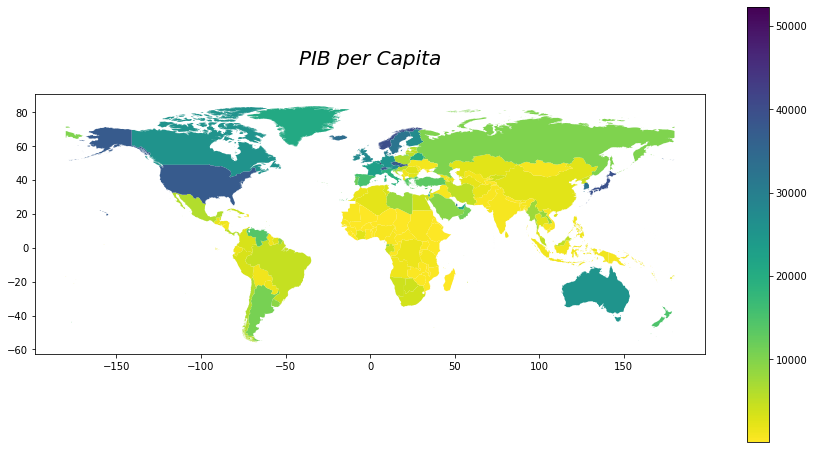

In [132]:
fig, ax = plt.subplots(figsize = (15,8))
sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=plt.Normalize(vmin=map_['PIB_per_capita'].min(), vmax=map_['PIB_per_capita'].max()))
cbar = fig.colorbar(sm)
map_.plot('PIB_per_capita', ax=ax, cmap="viridis_r")
plt.title('PIB per Capita', fontsize = "20", style = "italic", loc = "center", pad = 30)
plt.savefig(r"static\img\pib_mapa.png", dpi=300, facecolor='white', bbox_inches='tight')

#### Usuários de Internet

##### Adicionando valores manualmente de países faltantes

In [133]:
map_['usuarios_internet_%'][39] = 12.5

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\3927123238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][39] = 12.5


In [134]:
map_['usuarios_internet_%'][40] = 12.5

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\230054194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][40] = 12.5


In [135]:
map_['usuarios_internet_%'][50] = 4

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\1368462618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][50] = 4


In [136]:
map_['usuarios_internet_%'][61] = 71.9

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\1388203402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][61] = 71.9


In [137]:
map_['usuarios_internet_%'][69] = 35.7

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\3953274622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][69] = 35.7


In [138]:
map_['usuarios_internet_%'][107] = 84.1

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\111945843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][107] = 84.1


In [139]:
map_['usuarios_internet_%'][121] = 0

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\3313286868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][121] = 0


In [140]:
map_['usuarios_internet_%'][123] = 96.5

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\1875242027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][123] = 96.5


In [141]:
map_['usuarios_internet_%'][192] = 85

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\2416488149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][192] = 85


In [142]:
map_['usuarios_internet_%'][225] = 77.7

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\2127573568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][225] = 77.7


In [143]:
map_['usuarios_internet_%'][229] = 20

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\2030712106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][229] = 20


In [144]:
map_['usuarios_internet_%'][238] = 57

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\3203128299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][238] = 57


In [145]:
map_['usuarios_internet_%'][242] = 40.5

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\4089749344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][242] = 40.5


In [146]:
map_['usuarios_internet_%'][110] = 36.3

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\3861641813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][110] = 36.3


In [147]:
map_['usuarios_internet_%'][68] = 81.3

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\4078773763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][68] = 81.3


In [148]:
map_['usuarios_internet_%'][133] = 89.9

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\283082901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][133] = 89.9


In [149]:
map_['usuarios_internet_%'][27] = 85.1	

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\467414760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][27] = 85.1


In [150]:
map_['usuarios_internet_%'][120] = 51

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\1037464719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][120] = 51


In [151]:
map_['usuarios_internet_%'][25] = 35.1

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\1685184731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][25] = 35.1


In [152]:
map_['usuarios_internet_%'][127] = 33.8

C:\Users\manoe\AppData\Local\Temp\ipykernel_18644\295672929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_['usuarios_internet_%'][127] = 33.8


##### Plotando o mapa

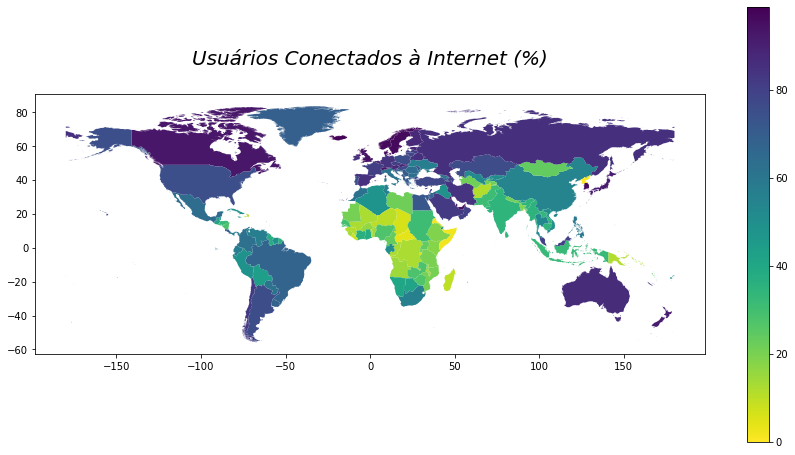

In [153]:
fig, ax = plt.subplots(figsize = (15,8))
sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=plt.Normalize(vmin=map_['usuarios_internet_%'].min(), vmax=map_['usuarios_internet_%'].max()))
cbar = fig.colorbar(sm)
map_.plot('usuarios_internet_%', ax=ax, cmap="viridis_r")
plt.title('Usuários Conectados à Internet (%)', fontsize = "20", style = "italic", loc = "center", pad = 30)
plt.savefig(r"static\img\usuarios_mapa.png", dpi=300, facecolor='white', bbox_inches='tight')